In [1]:
import numpy as np
from iblatlas.plots import plot_swanson_vector
from iblatlas.regions import BrainRegions
import iblatlas
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from itertools import combinations

In [4]:
br = BrainRegions()
tbl_ee = pd.read_csv(r'E:\Unbiased\GluA2\tbl_pair_ee.txt', delimiter='\t')
tbl_learn = pd.read_csv(r'E:\Unbiased\GluA2\tbl_pair_learn.txt', delimiter='\t')
tbl_ee_psd95 = pd.read_csv(r'E:\Unbiased\tbl_out2.csv', delimiter=',')

In [5]:
tbl_ee_psd95



,id,ratio
0,1,1.069891
1,2,1.231610
2,7,1.010294
3,9,1.280845
4,10,1.152789
...,...,...
575,607344850,1.066270
576,607344854,1.128229
577,607344858,1.110921
578,607344862,1.055451


In [6]:
def change_annotation_text_color(ax, color='white'):
    # Iterate through all children of the axes
    for child in ax.get_children():
        # Check if the child is an annotation text
        if isinstance(child, plt.Annotation):
            # Get the text object from the annotation
            text = child.findobj(match=type(plt.Text))
            if text:
                # Change the text color
                text[0].set_color(color)
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap
def change_annotation_texts(ax, text_dict):
    # Iterate through all children of the axes
    for child in ax.get_children():
        # Check if the child is an annotation text
        if isinstance(child, plt.Annotation):
            annotation_text = child.get_text()
            # Check if the current annotation text is a key in the dictionary
            if annotation_text in text_dict:
                # Get the new text from the dictionary and set it
                new_text = text_dict[annotation_text]
                child.set_text(new_text)

In [7]:
to_drop = np.argwhere(np.isin(tbl_learn['id'].values, [382001, 382002, 382003, 382004])).ravel()
tbl_learn2 = tbl_learn.drop(to_drop)
acr = br.id2id(tbl_learn2['id'].values, mapping='Swanson')
tbl_learn2['id2'] = acr
tbl_learn3 = tbl_learn2[['ratio','id2']]
learn_mean = tbl_learn3.groupby('id2').median()

In [8]:
to_drop = np.argwhere(np.isin(tbl_ee['id'].values, [382001, 382002, 382003, 382004])).ravel()
tbl_ee2 = tbl_ee.drop(to_drop)
acr = br.id2id(tbl_ee2['id'].values, mapping='Swanson')
tbl_ee2['id2'] = acr
tbl_ee3 = tbl_ee2[['ratio','id2']]
ee_mean = tbl_ee3.groupby('id2').median()


In [9]:
to_drop = np.argwhere(np.isin(tbl_ee_psd95['id'].values, [382001, 382002, 382003, 382004])).ravel()
tbl_ee_psd95_2 = tbl_ee_psd95.drop(to_drop)
acr = br.id2id(tbl_ee_psd95_2['id'].values, mapping='Swanson')
tbl_ee_psd95_2['id2'] = acr
tbl_ee_psd95_3 = tbl_ee_psd95_2[['ratio','id2']]
ee_psd95_mean = tbl_ee_psd95_3.groupby('id2').median()


In [10]:
data =  np.concatenate((learn_mean['ratio'].values,  ee_mean['ratio'].values, ee_psd95_mean['ratio'].values))
min, max = np.percentile(data, [.2,99.8])
min, max

(0.8278868146183861, 1.453665003827869)

C:\Users\moharb\AppData\Local\Temp\ipykernel_15368\179462661.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig = matplotlib.cm.get_cmap('bwr')
C:\Users\moharb\AppData\Local\Temp\ipykernel_15368\1090488568.py:58: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


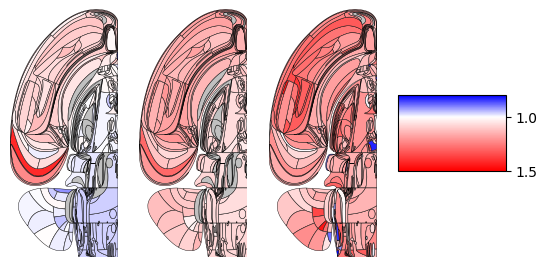

In [13]:
min = 0.8
max = 1.5
# orig = matplotlib.cm.get_cmap('Spectral_r')
orig = matplotlib.cm.get_cmap('bwr')
midpoint = (1 - min) / (max - min)
name = 'shifted6'
cmap = shiftedColorMap(orig, midpoint=midpoint, name=name, start=0)
fig, (ax1, ax2, ax3, cax) = plt.subplots(ncols=4)

acr = br.id2acronym(learn_mean.index.values, mapping='Swanson')
img1 = plot_swanson_vector(acr, learn_mean['ratio'].values, br=br, vmin=min, vmax=max,annotate=False, orientation='portrait', cmap=name, ax=ax1)
# change_annotation_text_color(img1, 'black')
ax1.axis('off')

acr = br.id2acronym(ee_mean.index.values, mapping='Swanson')
img2 = plot_swanson_vector(acr, ee_mean['ratio'].values, br=br, vmin=min, vmax=max,annotate=False , orientation='portrait', cmap=name, ax=ax2)
# change_annotation_text_color(img2, 'black')
ax2.axis('off')

acr = br.id2acronym(ee_psd95_mean.index.values, mapping='Swanson')
img3 = plot_swanson_vector(acr, ee_psd95_mean['ratio'].values, br=br, vmin=min, vmax=max,annotate=False, orientation='portrait', cmap=name, ax=ax3)
# change_annotation_text_color(img3, 'black')
ax3.axis('off')

a = np.array([[max,min]])
img = cax.imshow(a, cmap=name)
img.set_visible(False)
plt.colorbar( img,cax=cax, )
plt.savefig('flatmaps_v2.pdf')

C:\Users\moharb\Downloads\ONE\openalyx.internationalbrainlab.org\histology\ATLAS\Needles\Allen\flatmaps\swanson2allen.npz: 100%|█| 4


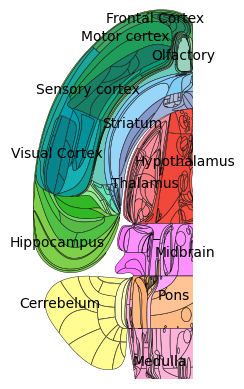

In [30]:

br = BrainRegions()

# Plot Swanson map will default colors and acronyms
ann_list = ['VISp', 'CA1', 'VPM', 'MOs', 'PL', 'PRNr', 'MRN', 'PVHd', 'ANcr1', 'IRN', 'CP', 'MOB', 'SSp-tr', 'VISrl']
ax = plot_swanson_vector(br=br, annotate=True, orientation='portrait',annotate_list=ann_list, cmap='shifted')
text_dict = {'VISp':'Visual Cortex', 'CA1':'Hippocampus','VPM':'Thalamus', 
             'MOs':'Motor cortex', 'PL':'Frontal Cortex', 'PRNr':'Pons', 
             'MRN':'Midbrain', 'PVHd':'Hypothalamus', 'ANcr1':'Cerrebelum',
             'IRN': 'Medulla', 'CP':'Striatum', 'MOB':'Olfactory',
             'SSp-tr':'Sensory cortex', 'VISrl':'testing'}
change_annotation_texts(ax, text_dict)

# plt.savefig('flatmap_annotation.eps')

# CC 

In [163]:
psd95 = pd.read_csv(r'E:\Unbiased\PSD95\PSD95_EE_14 days\psd95_turnover_new.txt', delimiter='\t')
glua2 = pd.read_csv(r'glua2_turnover.txt', delimiter='\t')

psd95 = psd95.rename(columns={'EE':'groupName'})
psd95 = psd95.replace({'groupName': {0: 'EE', 1:'control'}})
psd95['protein'] = 'psd95'
glua2['protein'] = 'glua2'

both = pd.concat([glua2, psd95])

both

,ANM,Sex,groupName,AP,Slice,Name,CCF_ID,tau,new_names,protein
0,BM6,male,random,484.153290,2,"Accessory olfactory bulb, glomerular layer",188,4.153656,Olfactory areas,glua2
1,BM6,male,random,506.441158,1,"Accessory olfactory bulb, granular layer",196,3.908736,Olfactory areas,glua2
2,BM6,male,random,484.153290,2,"Accessory olfactory bulb, mitral layer",204,3.797984,Olfactory areas,glua2
3,BM6,male,random,279.151560,11,Accessory supraoptic group,332,4.241890,Hypothalamus,glua2
4,BM6,male,random,452.129674,3,"Agranular insular area, dorsal part, layer 1",996,5.819976,Isocortex,glua2
...,...,...,...,...,...,...,...,...,...,...
4424,R2_M3,M,control,239.473194,12,"posteromedial visual area, layer 2/3",41,18.573170,Isocortex,psd95
4425,R2_M3,M,control,239.473194,12,"posteromedial visual area, layer 4",501,18.788830,Isocortex,psd95
4426,R2_M3,M,control,239.473194,12,"posteromedial visual area, layer 5",565,17.525580,Isocortex,psd95
4427,R2_M3,M,control,239.473194,12,"posteromedial visual area, layer 6a",257,16.383990,Isocortex,psd95


In [164]:
mapping = both.groupby(['ANM','groupName']).count().index
mapping = dict(mapping.values)
mapping2 = both.groupby(['ANM','protein']).count().index
mapping2 = dict(mapping2.values)
ANM_list = np.unique(both.ANM)
ANM_list

array(['BM6', 'BM7', 'BM8', 'BM9', 'C1', 'C2', 'C3', 'C4', 'Control1',
       'Control2', 'EE1', 'EE2', 'EE3', 'EE4', 'EE5', 'R2_F1', 'R2_F2',
       'R2_F3', 'R2_M1', 'R2_M2', 'R2_M3', 'VH1', 'VH2', 'VH4'],
      dtype=object)

In [165]:
all_comb = list(combinations(ANM_list, 2))
all_ratios = dict()
k = 0;
keys=[]
for anm1, anm2 in all_comb:
    cond1 = mapping[anm1]
    cond2 = mapping[anm2]
    p1 = mapping2[anm1]
    p2 = mapping2[anm2]
    if cond1 == cond2:
        continue
    if cond1 in ['random', 'rule'] and cond2 in ['EE','control']:
        continue
    if cond1 in ['EE','control'] and cond2 in ['random', 'rule']:
        continue
    if p1 != p2:
        continue
    # print((cond1, cond2, anm1, anm2, p1, p2))
    current = both.ANM.isin([anm1, anm2])
    df = both[current]
    valid = df.Name.value_counts()
    invalid = valid[valid == 1]
    valid_index = np.where([0 if x in invalid else 1 for x in df.Name ])
    df = df.reset_index(drop=True)
    df2 = df.loc[valid_index[0]]
    df2 = df2.reset_index(drop=True)
    df3 = df2.sort_values(by=['Name', 'ANM'],axis=0)
    vector = df3.tau.values
    a = vector[::2]
    b = vector[1::2]
    if cond1 in ['random','control']:
        ratio = (a-a.mean()) - (b-b.mean())
    else:
        ratio =  (b-b.mean()) - (a-a.mean())
    df4 = df3.iloc[::2, 5:]
    df4['ratio'] = ratio
    df4.CCF_ID =  df4.CCF_ID.replace({382001:382, 382002:382,382003:382, 382004:382})
    df4['flat'] = br.id2acronym(df4.CCF_ID, mapping='Swanson')
    df5 = df4.groupby(by=['flat'])['ratio'].median()
    if cond1 in ['random', 'rule']:
        key = 'learn'
    else:
        key = 'ee'
    all_ratios[k] = df5.copy()
    keys.append( '-'.join([key, p1]))
    k+=1

In [166]:
def unique_index_pairs(lst):
    indices = list(range(len(lst)))
    index_combinations = combinations(indices, 2)
    result_dict = {}
    for index_pair in index_combinations:
        value_pair = tuple(sorted([lst[index_pair[0]], lst[index_pair[1]]]))
        if value_pair not in result_dict:
            result_dict[value_pair] = []
        result_dict[value_pair].append(index_pair)
    return result_dict

In [181]:
groups = unique_index_pairs(keys)
coef_all = []
coef_all2 = []
se_all = []
for group, index in groups.items():
    coeff_current = [];
    for i, j in index:
        coeff_current.append(all_ratios[i].corr(all_ratios[j]))
    coef_all.append(np.mean(coeff_current))
    coef_all2.append(coeff_current)
    se_all.append(np.std(coeff_current) / len(coeff_current) **.5)

In [179]:
list(zip(groups.keys(), coef_all, se_all))

[(('learn-glua2', 'learn-glua2'), 0.5167850023735187, 0.07287285123512105),
 (('ee-glua2', 'learn-glua2'), 0.5797606058545383, 0.035144745904862364),
 (('ee-psd95', 'learn-glua2'), 0.18245048940850084, 0.024966048860724496),
 (('ee-glua2', 'ee-glua2'), 0.760364547629163, 0.015266483036782888),
 (('ee-glua2', 'ee-psd95'), 0.19709384954176729, 0.022148423522659517),
 (('ee-psd95', 'ee-psd95'), 0.20392765280689423, 0.040249585026323295)]

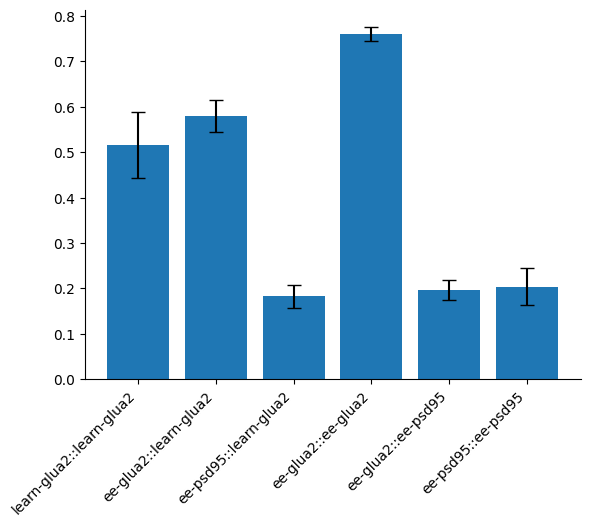

In [180]:
cats = ['::'.join(x) for x in list(groups.keys())]

plt.bar(cats, coef_all, yerr=se_all, capsize=5, )
plt.xticks(rotation=45, ha='right', va='top');
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [183]:
plt.xticks?

Signature:
plt.xticks(
    ticks: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    *,
    minor: 'bool' = False,
    **kwargs,
) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'
Docstring:
Get or set the current tick locations and labels of the x-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of xtick locations.  Passing an empty list removes all xticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
minor : bool, default: False
    If ``False``, get/set the major ticks/labels; if ``True``, the minor
    ticks/labels.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

Returns
-------
locs
    The list of xtick locations.
labels
    The list of xlabel `.Text` objects.

Notes
-----
Calling this function with no arguments (e.g. ``x

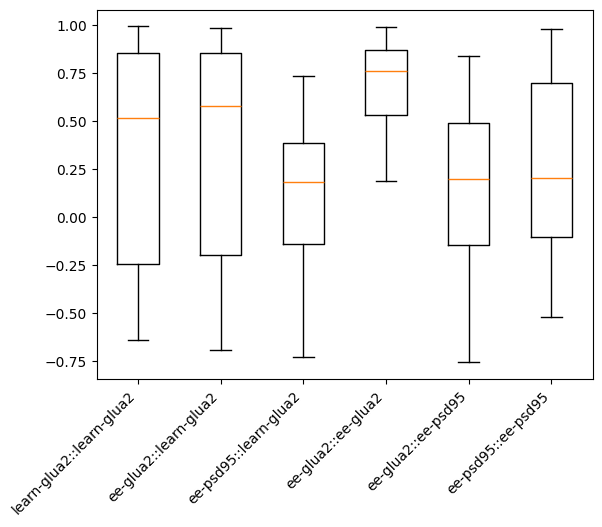

In [187]:
plt.boxplot(coef_all2)
cats = ['::'.join(x) for x in list(groups.keys())]
plt.xticks(range(1,7),cats,rotation=45, ha='right', va='top');

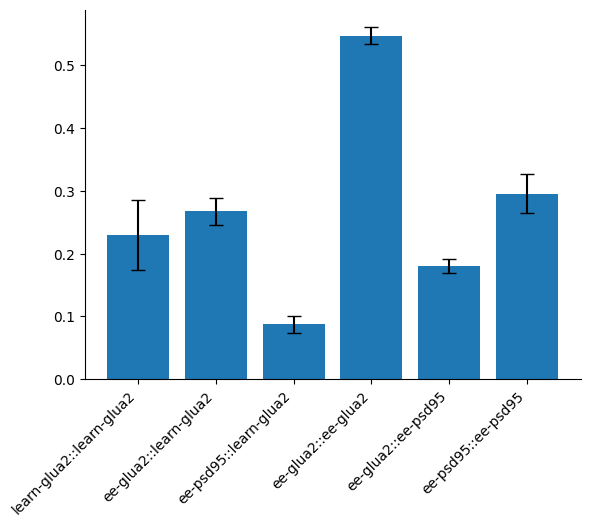

In [170]:
cats = ['::'.join(x) for x in list(groups.keys())]

plt.bar(cats, coef_all, yerr=se_all, capsize=5, )
plt.xticks(rotation=45, ha='right', va='top');
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [171]:
list(combinations(np.unique(keys), 2))

[('ee-glua2', 'ee-psd95'),
 ('ee-glua2', 'learn-glua2'),
 ('ee-psd95', 'learn-glua2')]

## For 12 large regions

In [188]:
all_comb = list(combinations(ANM_list, 2))
all_ratios = dict()
k = 0;
keys=[]
for anm1, anm2 in all_comb:
    cond1 = mapping[anm1]
    cond2 = mapping[anm2]
    p1 = mapping2[anm1]
    p2 = mapping2[anm2]
    if cond1 == cond2:
        continue
    if cond1 in ['random', 'rule'] and cond2 in ['EE','control']:
        continue
    if cond1 in ['EE','control'] and cond2 in ['random', 'rule']:
        continue
    if p1 != p2:
        continue
    print((cond1, cond2, anm1, anm2, p1, p2))
    current = both.ANM.isin([anm1, anm2])
    df = both[current]
    valid = df.Name.value_counts()
    invalid = valid[valid == 1]
    valid_index = np.where([0 if x in invalid else 1 for x in df.Name ])
    df = df.reset_index(drop=True)
    df2 = df.loc[valid_index[0]]
    df2 = df2.reset_index(drop=True)
    df3 = df2.sort_values(by=['Name', 'ANM'],axis=0)
    vector = df3.tau.values
    a = vector[::2]
    b = vector[1::2]
    if cond1 in ['random','control']:
        ratio = (a-a.mean()) - (b-b.mean())
    else:
        ratio =  (b-b.mean()) - (a-a.mean())
    df4 = df3.iloc[::2, 5:]
    df4['ratio'] = ratio
    
    df5 = df4.groupby(by=['new_names'])['ratio'].median()
    if cond1 in ['random', 'rule']:
        key = 'learn'
    else:
        key = 'ee'
    all_ratios[k] = df5.copy()
    keys.append( '-'.join([key, p1]))
    k+=1

('random', 'rule', 'BM6', 'BM8', 'glua2', 'glua2')
('random', 'rule', 'BM6', 'BM9', 'glua2', 'glua2')
('random', 'rule', 'BM6', 'VH1', 'glua2', 'glua2')
('random', 'rule', 'BM7', 'BM8', 'glua2', 'glua2')
('random', 'rule', 'BM7', 'BM9', 'glua2', 'glua2')
('random', 'rule', 'BM7', 'VH1', 'glua2', 'glua2')
('rule', 'random', 'BM8', 'VH2', 'glua2', 'glua2')
('rule', 'random', 'BM8', 'VH4', 'glua2', 'glua2')
('rule', 'random', 'BM9', 'VH2', 'glua2', 'glua2')
('rule', 'random', 'BM9', 'VH4', 'glua2', 'glua2')
('control', 'EE', 'C1', 'EE1', 'glua2', 'glua2')
('control', 'EE', 'C1', 'EE2', 'glua2', 'glua2')
('control', 'EE', 'C1', 'EE3', 'glua2', 'glua2')
('control', 'EE', 'C1', 'EE4', 'glua2', 'glua2')
('control', 'EE', 'C1', 'EE5', 'glua2', 'glua2')
('control', 'EE', 'C2', 'EE1', 'glua2', 'glua2')
('control', 'EE', 'C2', 'EE2', 'glua2', 'glua2')
('control', 'EE', 'C2', 'EE3', 'glua2', 'glua2')
('control', 'EE', 'C2', 'EE4', 'glua2', 'glua2')
('control', 'EE', 'C2', 'EE5', 'glua2', 'glua2')


In [189]:
keys

['learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'learn-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-glua2',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'ee-psd95',
 'learn-glua2',
 'learn-glua2']

In [190]:
groups = unique_index_pairs(keys)
coef_all = []
se_all = []
coef_all2 = []
for group, index in groups.items():
    coeff_current = [];
    for i, j in index:
        coeff_current.append(all_ratios[i].corr(all_ratios[j]))
    coef_all.append(np.mean(coeff_current))
    coef_all2.append(coeff_current)
    se_all.append(np.std(coeff_current) / len(coeff_current) **.5)
    print(group)
    print(len(coeff_current))
    print(np.mean(coeff_current))

('learn-glua2', 'learn-glua2')
66
0.29260197513778047
('ee-glua2', 'learn-glua2')
240
0.3696240617783094
('ee-psd95', 'learn-glua2')
192
0.1366666089092485
('ee-glua2', 'ee-glua2')
190
0.7000722654237891
('ee-glua2', 'ee-psd95')
320
0.16722461727550295
('ee-psd95', 'ee-psd95')
120
0.2715882904305476


In [191]:
coef_all2

[[0.8560471801183629,
  -0.3866895010196469,
  0.8974033340718888,
  0.8537544053910929,
  -0.5841813593638902,
  0.8490662505067764,
  0.9393251757698049,
  0.8638969304146411,
  0.8513207791165666,
  -0.21558104397790892,
  -0.12434874632667639,
  -0.346172994973943,
  0.856181030332844,
  0.9914641704359327,
  -0.6106306928940263,
  0.7621455572449409,
  0.8357552278504762,
  0.9858780382604032,
  0.9897803733655011,
  -0.21971028095393869,
  -0.2503999972964177,
  -0.25784119537922734,
  -0.34153896208946105,
  0.8190124907356192,
  -0.3138428544948034,
  -0.45754237469494824,
  -0.3344663552065587,
  -0.3409921149095061,
  0.5308186890018078,
  0.6699546669843999,
  0.8848939222639172,
  -0.45751217644301684,
  0.92447684172622,
  0.8742260342574362,
  0.9041713474997574,
  0.8851106849489154,
  0.025081058829261337,
  -0.053922759127301864,
  -0.6122629091773204,
  0.7929837309430107,
  0.8516358916573418,
  0.9880631604761799,
  0.9940620425159016,
  -0.1950833863514358,
  -0.22

In [192]:
list(zip(groups.keys(), coef_all, se_all))

[(('learn-glua2', 'learn-glua2'), 0.29260197513778047, 0.07287285123512105),
 (('ee-glua2', 'learn-glua2'), 0.3696240617783094, 0.035144745904862364),
 (('ee-psd95', 'learn-glua2'), 0.1366666089092485, 0.024966048860724496),
 (('ee-glua2', 'ee-glua2'), 0.7000722654237891, 0.015266483036782888),
 (('ee-glua2', 'ee-psd95'), 0.16722461727550295, 0.022148423522659517),
 (('ee-psd95', 'ee-psd95'), 0.2715882904305476, 0.040249585026323295)]

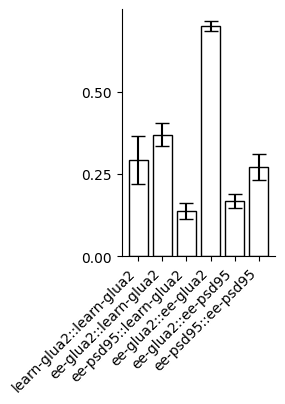

In [196]:
width_in_inches = 70 / 25.4
height_in_inches = 102 / 25.4

# Create the new figure with specified size
fig = plt.figure(figsize=(width_in_inches, height_in_inches))
cats = np.array(['::'.join(x) for x in list(groups.keys())])
coef_all = np.array(coef_all)
se_all = np.array(se_all)
index = range(6)
plt.bar(cats[index], coef_all[index], yerr=se_all[index], capsize=5, color='w' ,edgecolor='k')
plt.xticks(rotation=45, ha='right', va='top');
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks([0,0.25,0.5])
plt.tight_layout(pad=0.6)
plt.savefig('cc.eps')

In [101]:
coef_all

array([0.516785  , 0.57976061, 0.18245003, 0.76036455, 0.19709385,
       0.2039332 ])

In [102]:
coef_all2

[[0.8560471801183629,
  -0.3866895010196469,
  0.8974033340718888,
  0.8537544053910929,
  -0.5841813593638902,
  0.8490662505067764,
  0.9393251757698049,
  0.8638969304146411,
  0.8513207791165666,
  -0.21558104397790892,
  -0.12434874632667639,
  -0.346172994973943,
  0.856181030332844,
  0.9914641704359327,
  -0.6106306928940263,
  0.7621455572449409,
  0.8357552278504762,
  0.9858780382604032,
  0.9897803733655011,
  -0.21971028095393869,
  -0.2503999972964177,
  -0.25784119537922734,
  -0.34153896208946105,
  0.8190124907356192,
  -0.3138428544948034,
  -0.45754237469494824,
  -0.3344663552065587,
  -0.3409921149095061,
  0.5308186890018078,
  0.6699546669843999,
  0.8848939222639172,
  -0.45751217644301684,
  0.92447684172622,
  0.8742260342574362,
  0.9041713474997574,
  0.8851106849489154,
  0.025081058829261337,
  -0.053922759127301864,
  -0.6122629091773204,
  0.7929837309430107,
  0.8516358916573418,
  0.9880631604761799,
  0.9940620425159016,
  -0.1950833863514358,
  -0.22

In [103]:
coef_all2 = [coef_all2[i] for i in index]

In [104]:
coef_all2

[[0.11035732794682465,
  -0.0710976371608456,
  0.3510910496612825,
  -0.25214879936649487,
  0.2860281399236856,
  0.24421274107406488,
  0.4854863915435148,
  -0.08371526497087875,
  0.2962553406417457,
  0.4718112424157425,
  0.20346706314662913,
  0.49526841766645824,
  0.2635823279360431,
  -0.24005775989577735,
  0.5428068873046489,
  0.35625489093757373,
  -0.09851078882804068,
  -0.27467311530185406,
  0.13827711122420705,
  -0.4052943264681126,
  0.12674293461709146,
  0.009218547095156229,
  0.36916014431101674,
  -0.1662790228241488,
  0.34319365076814023,
  0.7328197866277093,
  0.2088083049779877,
  0.7091831045189515,
  0.3147045239291577,
  -0.13042434202802508,
  0.736255026608518,
  0.631356255311362,
  0.44642395363138115,
  0.2296984195023432,
  0.36943204773373334,
  0.43007599021057297,
  0.23724603779414571,
  0.09396579003827711,
  0.03587598010094221,
  0.20542725917427457,
  0.1285390044116261,
  -0.04105094593749913,
  -0.08263656187231001,
  -0.13144153135265

In [105]:
coef_all2

[[0.11035732794682465,
  -0.0710976371608456,
  0.3510910496612825,
  -0.25214879936649487,
  0.2860281399236856,
  0.24421274107406488,
  0.4854863915435148,
  -0.08371526497087875,
  0.2962553406417457,
  0.4718112424157425,
  0.20346706314662913,
  0.49526841766645824,
  0.2635823279360431,
  -0.24005775989577735,
  0.5428068873046489,
  0.35625489093757373,
  -0.09851078882804068,
  -0.27467311530185406,
  0.13827711122420705,
  -0.4052943264681126,
  0.12674293461709146,
  0.009218547095156229,
  0.36916014431101674,
  -0.1662790228241488,
  0.34319365076814023,
  0.7328197866277093,
  0.2088083049779877,
  0.7091831045189515,
  0.3147045239291577,
  -0.13042434202802508,
  0.736255026608518,
  0.631356255311362,
  0.44642395363138115,
  0.2296984195023432,
  0.36943204773373334,
  0.43007599021057297,
  0.23724603779414571,
  0.09396579003827711,
  0.03587598010094221,
  0.20542725917427457,
  0.1285390044116261,
  -0.04105094593749913,
  -0.08263656187231001,
  -0.13144153135265

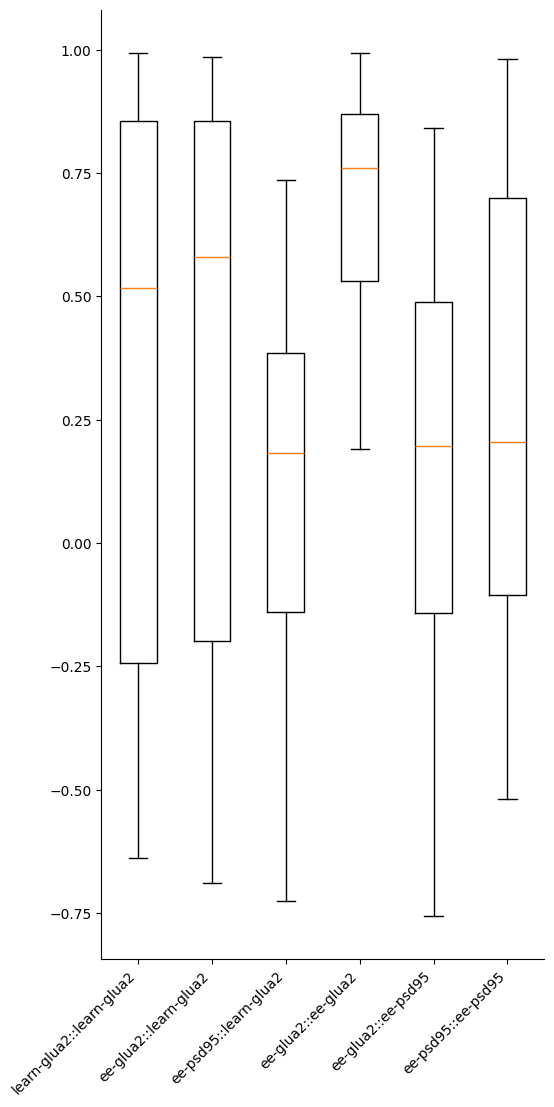

In [199]:
width_in_inches = 130 / 25.4
height_in_inches = 252 / 25.4

# Create the new figure with specified size
fig = plt.figure(figsize=(width_in_inches, height_in_inches))
index = [2,1,4]
plt.boxplot( coef_all2 )
plt.xticks(rotation=45, ha='right', va='top');
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.yticks([0,0.25,0.5])
plt.tight_layout(pad=0.6)
plt.savefig('cc.eps')

plt.xticks(range(1,7),cats,rotation=45, ha='right', va='top');

In [63]:
plt.boxplot?

Signature:
plt.boxplot(
    x: 'ArrayLike | Sequence[ArrayLike]',
    notch: 'bool | None' = None,
    sym: 'str | None' = None,
    vert: 'bool | None' = None,
    whis: 'float | tuple[float, float] | None' = None,
    positions: 'ArrayLike | None' = None,
    widths: 'float | ArrayLike | None' = None,
    patch_artist: 'bool | None' = None,
    bootstrap: 'int | None' = None,
    usermedians: 'ArrayLike | None' = None,
    conf_intervals: 'ArrayLike | None' = None,
    meanline: 'bool | None' = None,
    showmeans: 'bool | None' = None,
    showcaps: 'bool | None' = None,
    showbox: 'bool | None' = None,
    showfliers: 'bool | None' = None,
    boxprops: 'dict[str, Any] | None' = None,
    labels: 'Sequence[str] | None' = None,
    flierprops: 'dict[str, Any] | None' = None,
    medianprops: 'dict[str, Any] | None' = None,
    meanprops: 'dict[str, Any] | None' = None,
    capprops: 'dict[str, Any] | None' = None,
    whiskerprops: 'dict[str, Any] | None' = None,
    manage_ticks: